# Data Cleaning & Preparation Steps
### Cleaning process 
1. Check for Missing Values
2. Check for Duplicates
3. Validate Column Names
4. Check Data Types
5. Check for Outliers


In [66]:
# Imports
# Pandas for structuring the data
import pandas as pd

# numpy for numerical analysis
import numpy as np

# matplotlib for diagrams inline with text
import matplotlib.pyplot as plt
%matplotlib inline 

#for generating random numbers
import random

import seaborn as sns

# the most important library for machine learning algorithms
from sklearn import datasets, svm, tree, preprocessing, metrics

## Reading and loading data. Then adding a new column for "wine type"

In [42]:
# read the file into a pandas dataframe
df = pd.read_excel('data/winequality-red.xlsx', skiprows=1)

In [44]:
# Adding wine type column
df['wine type'] = 'red'

In [47]:
# The different attribute labels 
list(df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'wine type']

In [61]:
# Getting an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1359 non-null   float64 
 1   volatile acidity      1359 non-null   float64 
 2   citric acid           1359 non-null   float64 
 3   residual sugar        1359 non-null   float64 
 4   chlorides             1359 non-null   float64 
 5   free sulfur dioxide   1359 non-null   float64 
 6   total sulfur dioxide  1359 non-null   float64 
 7   density               1359 non-null   float64 
 8   pH                    1359 non-null   float64 
 9   sulphates             1359 non-null   float64 
 10  alcohol               1359 non-null   float64 
 11  quality               1359 non-null   int64   
 12  wine type             1359 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 139.5 KB


In [52]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### As seen above on count, there are NO missing values, Which is good. 
#### Possible outliers:
#### "total sulfur dioxide" with a mean of 46.46 but a max of 289. Also has an std on 32.89, which means there are a lot of variations. 

In [65]:
# The data
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


## Cleaning data

In [54]:
# Checking for any missing values (even if it says there are none above)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine type               0
dtype: int64

##### No missing values as expected.

In [57]:
# Checking for duplicates 
df.duplicated().sum()

0

##### 240 duplicates in the data sheet, meaning 15% of our data is redundant (Will be deleted).

In [56]:
# Deleting duplicates
df.drop_duplicates(inplace=True)

In [60]:
# Fixing data type - OBS. All data is actually pretty good as we can see further up under info(), but to make it more efficient the "wine type" gets changed from string to category.
df['wine type'] = df['wine type'].astype('category')

In [ ]:
# Standardizing column names - removing space.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

##### Finding outliers

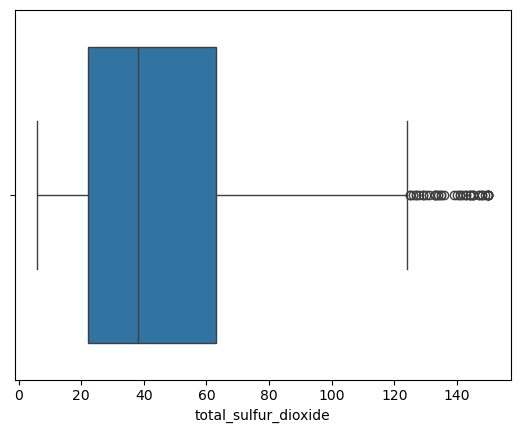

In [71]:
# Boxplot for 'total sulfur dioxide'
sns.boxplot(x=df['total_sulfur_dioxide'])
plt.show()

##### There are two dots after 250 to 300 are major outliers and needs to be removed. The other two at the end are medium outliers, and might just get capped. So everything from 0-200 is normal range, a bit after 150 are possible outliers.

In [68]:
# Removing anything over 250. 
df = df[df['total_sulfur_dioxide'] <= 250]

In [77]:
# Calculating Q1, Q3, and IQR
Q1 = df['total_sulfur_dioxide'].quantile(0.25)
Q3 = df['total_sulfur_dioxide'].quantile(0.75)
IQR = Q3 - Q1

# Finding lower and upper boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [78]:
# Showing the calculations
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Q1 (25th percentile): 22.0
Q3 (75th percentile): 63.0
IQR (Interquartile Range): 41.0
Lower Bound: -39.5
Upper Bound: 124.5


##### We will ignore the lower bound, since sulfur dioxide can't go into minus. But we can see that upper bound is at 124.5, which means we should cap at that value, so that everything over 124.5 gets that exact value. 

In [79]:
# Seeing the outliers
outliers = df[(df['total_sulfur_dioxide'] < lower_bound) | (df['total_sulfur_dioxide'] > upper_bound)]
print(outliers[['total_sulfur_dioxide']])

      total_sulfur_dioxide
14                   145.0
15                   148.0
86                   136.0
88                   125.0
90                   140.0
92                   133.0
109                  150.0
130                  134.0
145                  141.0
154                  129.0
155                  128.0
188                  143.0
189                  144.0
190                  127.0
192                  126.0
201                  145.0
219                  144.0
313                  135.0
354                  150.0
415                  134.0
463                  129.0
515                  150.0
522                  133.0
523                  142.0
591                  149.0
636                  147.0
637                  145.0
649                  148.0
651                  150.0
672                  150.0
684                  150.0
694                  125.0
723                  127.0
741                  139.0
771                  143.0
772                  144.0
7

##### Here we see the outliers, now since it feels very strict to cap exactly at 124.5 - which is if we are at laboratory lvl's which needs strict data. Since we are not, we will find the median between the outliers, and cap at that. 

In [81]:
outlier_values = outliers['total_sulfur_dioxide']

print(outlier_values.min())
print(outlier_values.median())
print(outlier_values.max())

125.0
141.0
150.0


##### We will be capping at 140 - since we at this value won't lose valuable natural variance around 130-140 sulfur. This is also being business-smart since a lot of wineries would allow this extend
##### of sulfur variation in their wines. 

In [82]:
# Capping, making sure that anything over 150 just gets 150 as a value
df['total_sulfur_dioxide'] = df['total_sulfur_dioxide'].clip(upper=140)

C:\Users\nadia\AppData\Local\Temp\ipykernel_2304\3665758083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sulfur_dioxide'] = df['total_sulfur_dioxide'].clip(upper=140)


In [83]:
# Saving the cleaned data sheet as a csv file.
df.to_csv('red_wine_cleaned.csv', index=False)